### 참고자료
https://laboputer.github.io/machine-learning/2020/03/12/mnist995/

In [79]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [80]:
# --------------
# 데이터 불러오기
# --------------

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 각종 파라메터의 영향을 보기 위해 랜덤값 고정
tf.random.set_seed(1234)

Y[9497] :  6


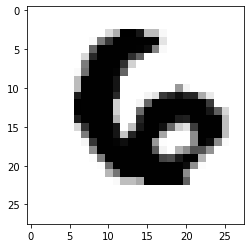

In [81]:
r = random.randint(0, len(x_test)-1) # 0~9999까지 랜덤한 정수
print("Y[%d] : "%r,  y_train[r])
plt.imshow(x_train[r], cmap=plt.cm.gray_r, interpolation = "nearest")

In [82]:
# 데이터 전처리
# Normalizing
# 28x28개의 각 픽셀을 0~255 값으로 구성
x_train, x_test = x_train / 255.0, x_test / 255.0

# (60000, 28, 28) => (60000, 28, 28, 1)로 reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [83]:
# -----------------------
# 모델 생성 및 학습
# -----------------------

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, input_shape=(28,28,1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))



C:\Users\Lab01\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)             

In [84]:
result = model.evaluate(x_test, y_test)
print("최종 예측 성공률(%): ", result[1]*100)

313/313 [==============================] - 5s 16ms/step - loss: 0.0195 - accuracy: 0.9945
최종 예측 성공률(%):  99.44999814033508


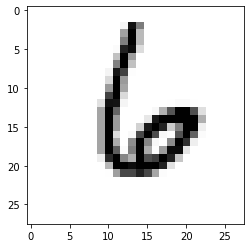

predict: 6
answer: 6


In [85]:
# -----------------------
# 랜덤으로 숫자 뽑아서 test
# -----------------------

r = random.randint(0, len(x_test)-1) # 0~9999까지 랜덤한 정수
plt.imshow(x_test[r].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()
print("predict:", np.argmax(model.predict(x_test[r].reshape((1, 28, 28, 1)))))
print('answer:', np.argmax(y_test[r]))


In [86]:
# -----------------------
# 오답 샘플 출력
# -----------------------

wrongs = []

for i in range(len(x_test)):
    predict = np.argmax(model.predict(x_test[i].reshape((1, 28, 28, 1))))
    label = np.argmax(y_test[i])
    if predict != label:
        wrongs.append(i)


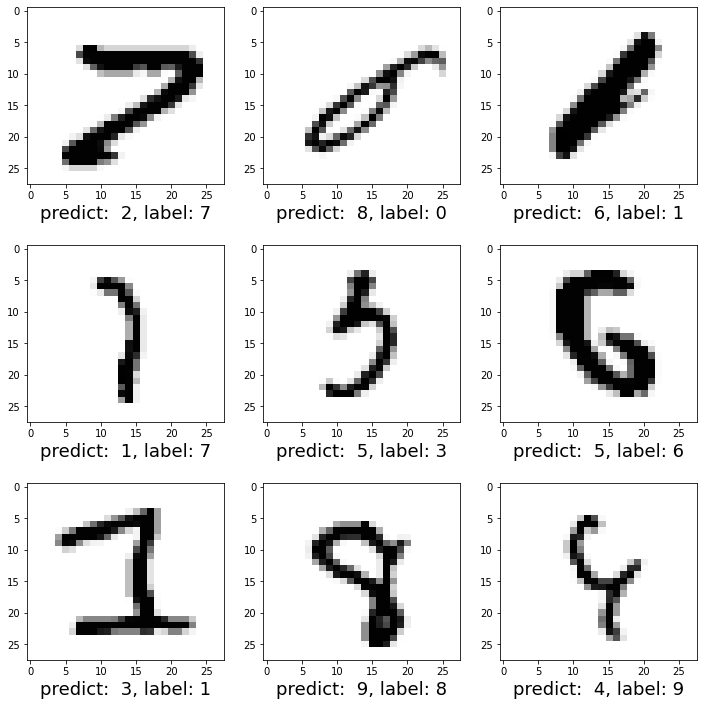

In [96]:
rows = 3
columns = 3
fig=plt.figure(figsize=(12,12))
axes = []

for i in range(rows * columns):
    r = random.randint(0, len(wrongs)-1)
    predict = np.argmax(model.predict(x_test[wrongs[r]].reshape((1, 28, 28, 1))))
    label = np.argmax(y_test[wrongs[r]])
    img = x_test[wrongs[r]].reshape(28, 28)
    title = 'predict: % d, label: %d'%(predict, label)
    
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.imshow(img, cmap='Greys', interpolation='nearest', aspect='auto')
    # ax.set_title(title, fontsize=20)
    ax.set_xlabel(title, fontsize=18)


plt.subplots_adjust(hspace=0.35)
# plt.subplots(constrained_layout=True)
plt.show()